<a href="https://colab.research.google.com/github/ghatanisuresh/DataScience_tutorial/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bike Sharing Demand

We will be working with a dataset from Capital Bikeshare.

## Dataset Description

The dataset, "Bike Sharing Demand,".

Each row represents an hour of data with various features (or variables) that capture different environmental and situational factors influencing bike usage. Here's a breakdown of the columns:

1. **datetime**: The date and time of the data point. This is important because the bike-sharing demand changes over time (seasonal, daily, and hourly variations).

2. **season**: Encoded categorical variable indicating the season of the year (1 = winter, 2 = spring, 3 = summer, 4 = fall).

3. **holiday**: A binary indicator (0 or 1) showing whether the day is a public holiday.

4. **workingday**: A binary indicator showing whether the day is a working day (1) or not (0). Non-working days include weekends and holidays.

5. **weather**: Encoded variable describing the weather conditions:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

6. **temp**: The actual temperature in degrees Celsius.

7. **atemp**: "Feels like" temperature, which accounts for the effect of humidity and wind on how the temperature feels to people.

8. **humidity**: The relative humidity percentage.

9. **windspeed**: The wind speed in meters per second.

10. **casual**: The number of casual (non-registered) users who rented bikes during that hour.

11. **registered**: The number of registered users who rented bikes during that hour.

12. **count**: The total number of bike rentals (sum of casual and registered).

This dataset is likely intended for predicting the total count of bike rentals based on the features (season, weather, temperature, etc.), which makes it suitable for regression analysis, especially linear regression.

Let me know when you're ready to proceed with the next step.



In [50]:
from os import sep
import pandas as pd
import numpy as np


## Loading the data

In [48]:

# load the data

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'

bikes = pd.read_csv(url)
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [51]:
# let's make datetime as the index

bikes.set_index('datetime', inplace = True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#another option to set the index in the first hand while loading the data
#bikes = pd.read_csv(url, index_col = 'datetime')

In [32]:
# check the dtype of datetime
print(bikes.index.dtype)


object


As the datetime is in object format, need to convert into datetime format.

method:

a. Set the __parse_dates__ = True in the intitial while loading the data.

b.

In [73]:
# "a" method:

bikes = pd.read_csv(url, parse_dates = True, index_col = 'datetime')
print(bikes.index.dtype)

datetime64[ns]


In [53]:
# second method

bikes.index = pd.to_datetime(bikes.index)
print(bikes.index.dtype)


datetime64[ns]


In [74]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Looking at the data above, there is column name 'count', which could be confusing because 'count' in python is method. So, it's better to rename that column into total.

In [75]:
bikes.rename(columns = {'count':'total'}, inplace = True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Questions?

* What does each observation represent?
* what is the response variable?
* how many features are there?

In [55]:
response_variable = 'total'
print(f'The response variable is: {response_variable}')

The response variable is: total


In [56]:
# total features

features = bikes.columns[bikes.columns != response_variable]
print(f'The features are: {features}')

The features are: Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')


In [57]:
# alternative option to view total features

features = bikes.drop(columns = ['total']).columns
num_features = len(features)
num_features

10

## Visualising the data

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelweight'] = 'bold'

<Axes: xlabel='temp', ylabel='total'>

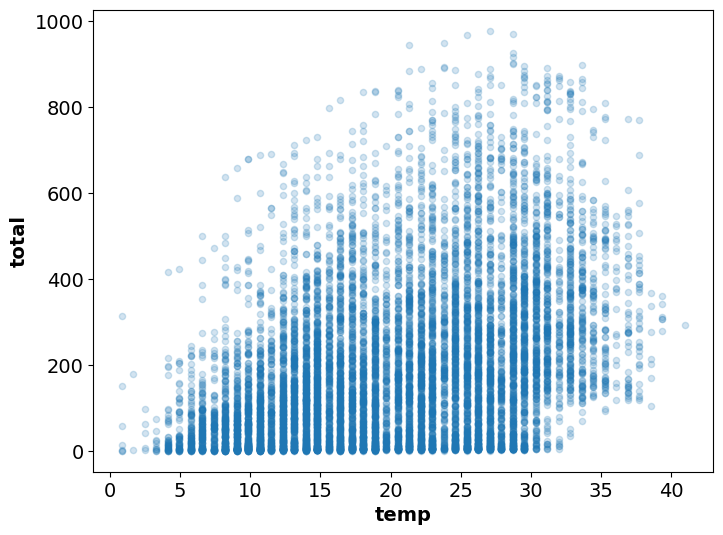

In [86]:
# pandas scatter plot

bikes.plot(kind = 'scatter', x = 'temp', y = 'total', alpha = 0.2)

## Distribution of the response variable (total)


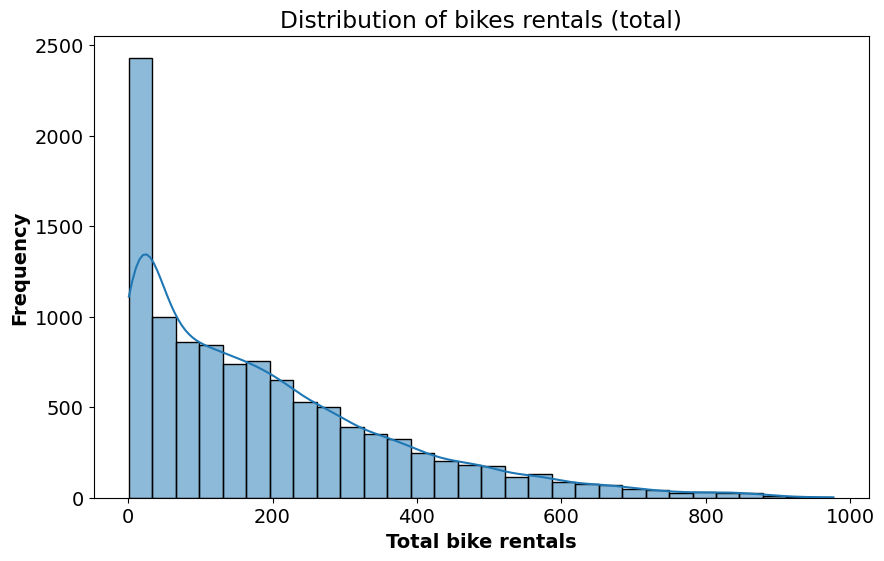

In [87]:
# set up the figure

plt.figure(figsize = (10, 6))

# histogram of the response variable 'total'
sns.histplot(bikes['total'], kde = True, bins = 30)
plt.title('Distribution of bikes rentals (total)')
plt.xlabel('Total bike rentals')
plt.ylabel('Frequency')
plt.show()


### Interpretation:
- **X-axis (Total bike rentals)**: This axis represents the number of bike rentals in a particular hour, which ranges from 0 to about 1000.
- **Y-axis (Frequency)**: This axis represents the frequency or the number of occurrences for each range of total bike rentals.
- **Distribution**: The distribution of bike rentals is highly skewed to the right, meaning that in most observations, the total number of rentals is low, with a large concentration of data around 0 to 200 bike rentals per hour.
  - There is a significant number of hours where very few (even 0) bikes were rented.
  - As the total number of rentals increases (towards 600-1000 rentals per hour), the frequency decreases sharply.

### Key Insights:
- **Right-skewed distribution**: This suggests that most of the time, the bike-sharing system experiences relatively low demand. Only a small number of instances have higher demand.
- **Potential for transformation**: Given the skewness of the data, you might want to apply a transformation (e.g., logarithmic transformation) to normalize the distribution if you're considering linear regression or other parametric modeling techniques.


## let's perform logarithmic transformation

In [64]:
# apply log transform

bikes['total'] = np.log1p(bikes['total'])  # log1p is used to avoid log(0) issues


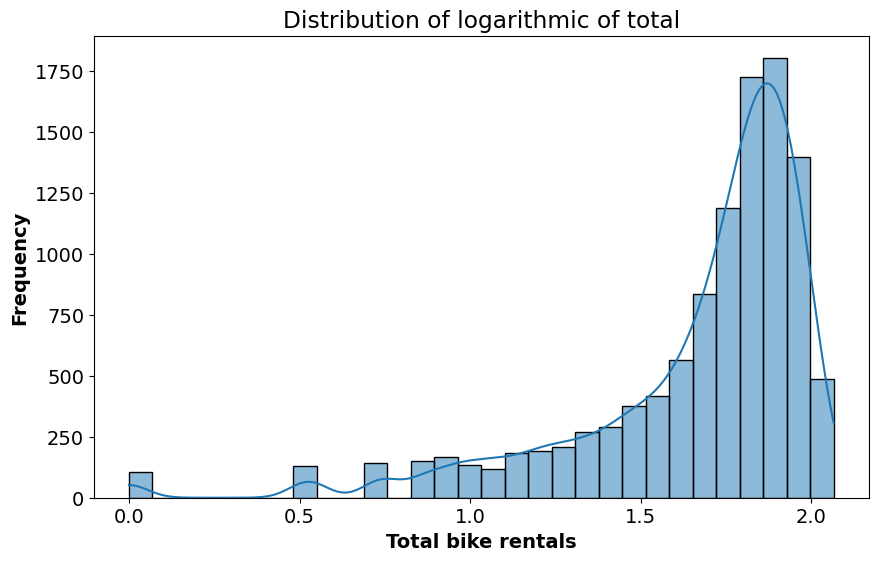

In [65]:
plt.figure(figsize = (10, 6))

sns.histplot(bikes['total'], kde = True, bins = 30)
plt.title ('Distribution of logarithmic of total')
plt.xlabel('Total bike rentals')
plt.ylabel('Frequency')
plt.show()

<Axes: >

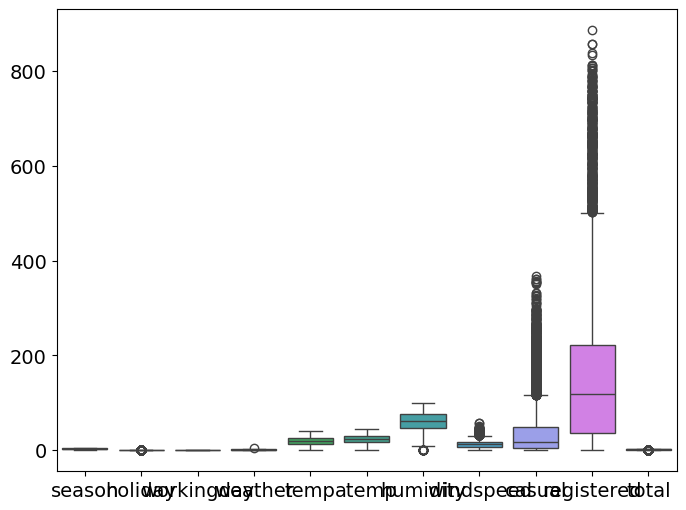

In [66]:
sns.boxplot(bikes)

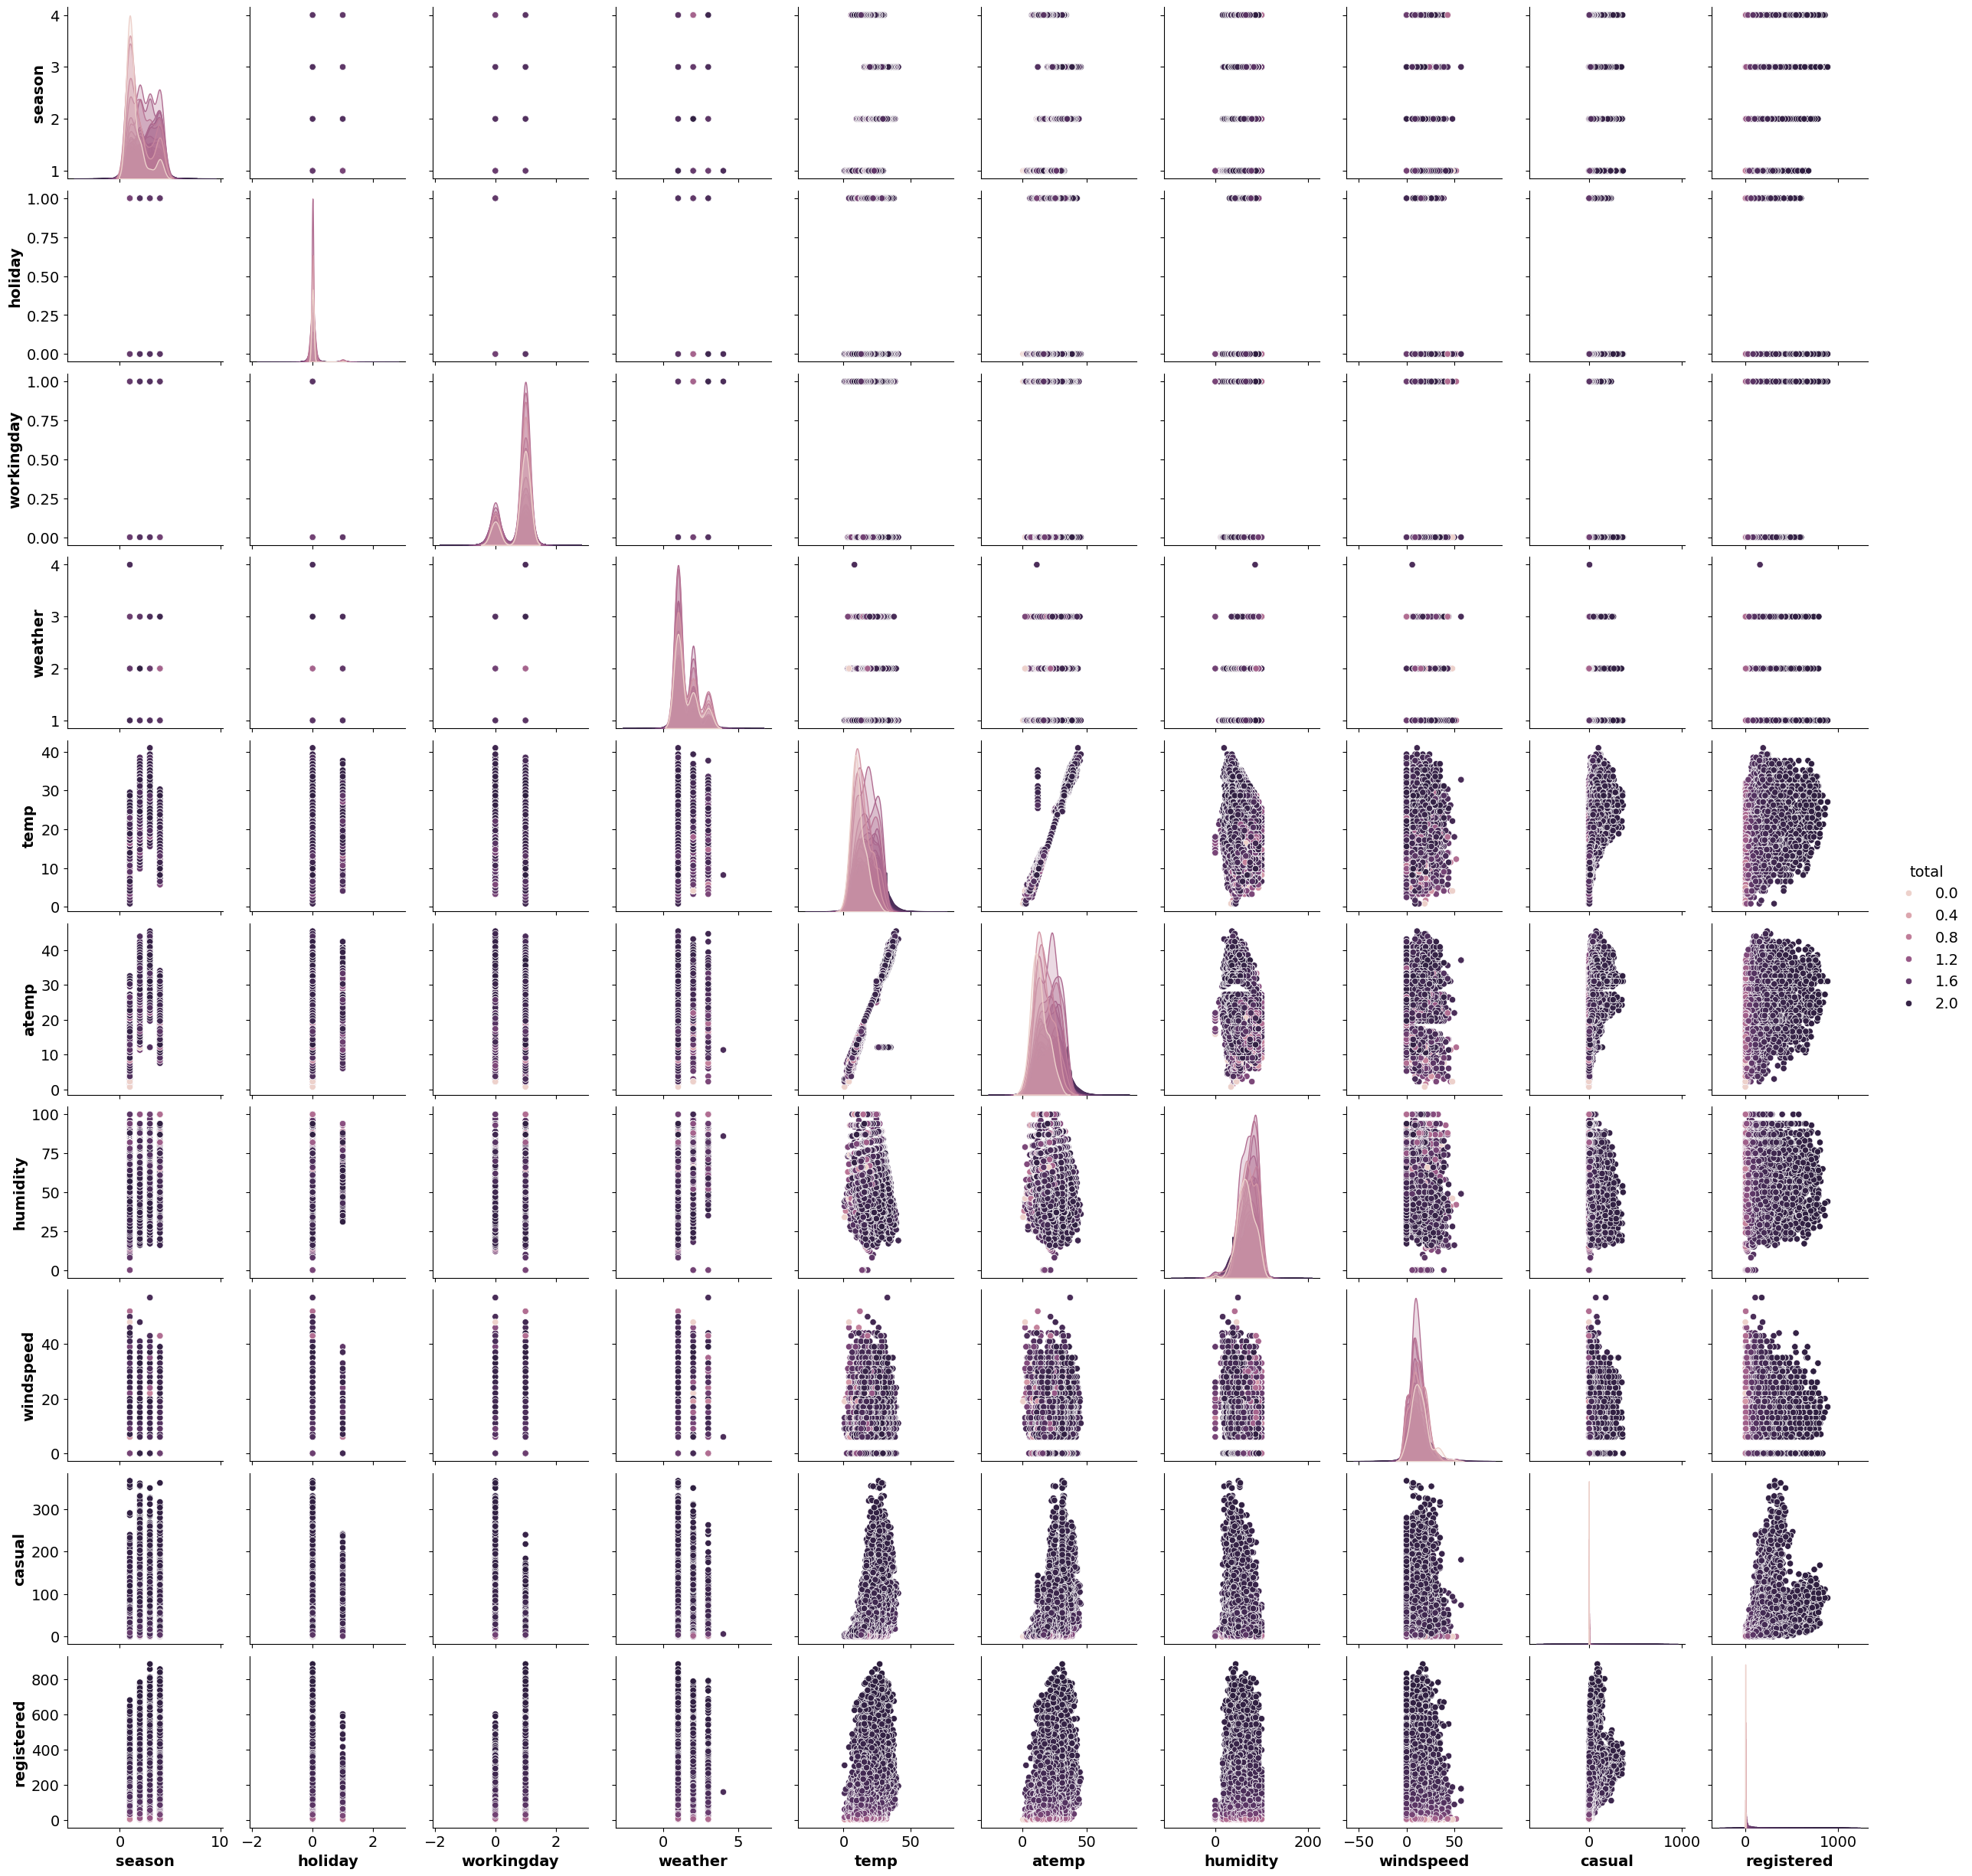

In [70]:
# prompt: make pairplot


sns.pairplot(bikes,hue = 'total')


In [71]:
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.155899
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,0.003806
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,-0.033429
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.089346
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.340507
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.336855
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.286913
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.103615
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.480233
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.660865


In [72]:
bikes['total']

,total
datetime,
2011-01-01 00:00:00,1.327761
2011-01-01 01:00:00,1.545194
2011-01-01 02:00:00,1.496434
2011-01-01 03:00:00,1.271150
2011-01-01 04:00:00,0.000000
...,...
2012-12-19 19:00:00,1.919436
2012-12-19 20:00:00,1.869461
2012-12-19 21:00:00,1.812210


https://github.com/justmarkham/DAT8/blob/master/notebooks/10_linear_regression.ipynb